# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week2/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.loc[df["sex"]=="female","sex"] = 1
df.loc[df["sex"]=="male","sex"] = 0
df.loc[df["smoker"]=="yes","smoker"] = 1
df.loc[df["smoker"]=="no","smoker"] = 0
df["northwest"] = 0
df.loc[df["region"]=="northwest","northwest"] = 1
df["northeast"] = 0
df.loc[df["region"]=="northeast","northeast"] = 1
df["southwest"] = 0
df.loc[df["region"]=="southwest","southwest"] = 1
df["southeast"] = 0
df.loc[df["region"]=="southeast","southeast"] = 1

In [ ]:
#Convert smoker and region, Investigate scikit .LabelEncoder

In [ ]:
order = ['age','sex','bmi','children','smoker','northwest','northeast','southwest','southeast','charges']
df = df[order]
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:,-1:])

In [ ]:
df

,age,sex,bmi,children,smoker,northwest,northeast,southwest,southeast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92400
1,18,0,33.770,1,0,0,0,0,1,1725.55230
2,28,0,33.000,3,0,0,0,0,1,4449.46200
3,33,0,22.705,0,0,1,0,0,0,21984.47061
4,32,0,28.880,0,0,1,0,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0,0,0,10600.54830
1334,18,1,31.920,0,0,0,1,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,0,1,0,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
cut = int((len(data)*.8)//1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [ ]:
in_data_scale = scaler.transform(in_data)

In [ ]:
scaler2 = preprocessing.StandardScaler().fit(out_data)

In [ ]:
out_data_scale = scaler2.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
modCV.alpha_

176.27926602952408

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
mod = Lasso(alpha = modCV.alpha_).fit(in_data_scale,in_target)
mod.coef_

array([3528.02573535,    0.        , 1826.25842562,  357.05552225,
       9280.6004751 ,    0.        ,  184.56649395,  -65.22282232,
         -0.        ])

# 6.) Visualize the coefficients 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lmod = LinearRegression().fit(in_data_scale,in_target)
lmod.coef_

array([[3667.98588208,  126.87434322, 2062.82119566,  523.23705699,
        9477.91252343,  104.65017576,  308.58202653, -226.58233979,
        -179.30068575]])

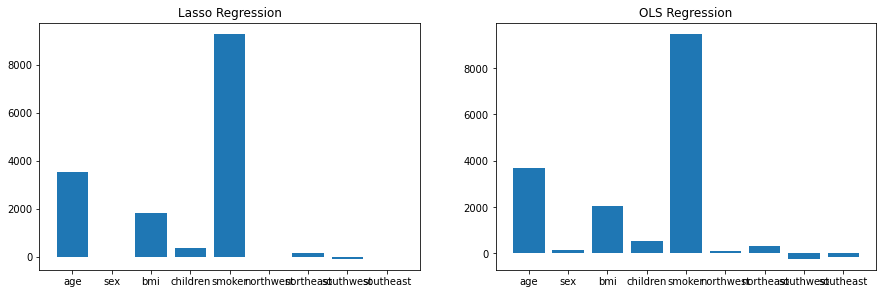

In [ ]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
plt.bar(order[:-1],mod.coef_)
plt.title('Lasso Regression')

ax=fig.add_subplot(2,2,2) 
plt.bar(order[:-1],lmod.coef_[0])
plt.title('OLS Regression')
plt.show()

# 7.) Interpret the coefficients

When age increase by one stardard deviation, we estimate insurance charges will increase 3596.47976234 in general.

# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
in_predict = mod.predict(in_data_scale)
mean_squared_error(in_target, in_predict)

36603129.01103468

In [ ]:
out_predict = mod.predict(out_data_scale)
mean_squared_error(out_target, out_predict)

37709381.247296244

As we can see, in sample MSE is 36452857.248283505, out sample MSE is 37557567.15988508